In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob

import rioxarray
import xarray as xr

AttributeError: module 'contextlib' has no attribute 'nullcontext'

###  NEWA CE

In [5]:
newa=xr.open_dataset('//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-CE-2017-2017-01-07.nc')

In [7]:
newa.crs

<xarray.DataArray 'crs' ()>
array(b'', dtype='|S1')
Attributes:
    semi_major_axis:                6370000.0
    inverse_flattening:             0.0
    grid_mapping_name:              lambert_conformal_conic
    longitude_of_central_meridian:  15.0
    false_easting:                  0.0
    false_northing:                 0.0
    latitude_of_projection_origin:  54.0
    standard_parallel:              [30. 60.]
    longitude_of_prime_meridian:    0.0
    proj:                           +units=m +proj=lcc +lat_1=30.0 +lat_2=60....

###  ERA5 nc data (surface)

In [2]:
files=glob("//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/era5sfc/*.nc")

In [3]:
files

['//smb.uni-oldenburg.de/hpc_data/thesis/data/ncfiles/era5sfc\\ERA5_sfc_20181217.nc']

In [4]:
ds_s=xr.open_dataset(files[0])

In [9]:
ds_s2=ds_s.rio.write_crs(newa.crs)

AttributeError: 'Dataset' object has no attribute 'rio'

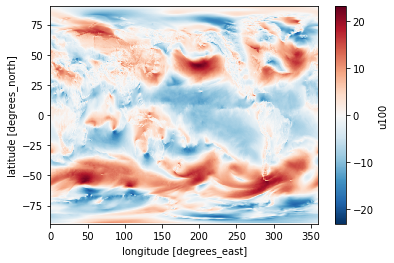

In [27]:
ds.u100.mean(dim="time").plot()

In [18]:
ds_s

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 24)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2018-12-17 ... 2018-12-17T23:00:00
Data variables:
    u100       (time, latitude, longitude) float32 ...
    v100       (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    ssrd       (time, latitude, longitude) float32 ...
    mdts       (time, latitude, longitude) float32 ...
    mdww       (time, latitude, longitude) float32 ...
    mpts       (time, latitude, longitude) float32 ...
    mpww       (time, latitude, longitude) float32 ...
    mwd        (time, latitude, longitude) float32 ...
    mwp        (time, latitude, longitude) float32 ...
    mp2        (time, latitude, longitude) float32 ...
    pp1d       (time, latitude, longitude) float32 ...
    swh        (time, latitude, longitude) float32 ...
    shts       (time, latitude, longitude) float32 ...
    shww       (time, latitude, longitude) float32 ...
    blh        (time, latitude, longitude) float32 ...
    slhf       (time, latitude, longitude) float32 ...
    sshf       (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    zust       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-12-17 11:42:48 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

In [26]:
ds_s.

<xarray.DataArray 'sst' (time: 24, latitude: 721, longitude: 1440)>
[24917760 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2018-12-17 ... 2018-12-17T23:00:00
Attributes:
    units:      K
    long_name:  Sea surface temperature

###  ERA5 grib data

In [8]:
files=glob("//smb.uni-oldenburg.de/hpc_data/thesis/data/grib/*")
files

['//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_0000.grb',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_0000.grb.90c91.idx',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_0100.grb',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_0200.grb',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_0300.grb',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_0400.grb',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_0500.grb',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_0600.grb',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_0700.grb',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_0800.grb',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_0900.grb',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_1000.grb',
 '//smb.uni-oldenburg.de/hpc_data/thesis/data/grib\\ERA5_20181217_

In [9]:
ds=xr.open_dataset(files[0], engine='cfgrib')

Can't read index file '\\\\smb.uni-oldenburg.de\\hpc_data\\thesis\\data\\grib\\ERA5_20181217_0000.grb.90c91.idx'
Traceback (most recent call last):
  File "C:\Users\Notandi\Anaconda3\envs\tf_env\lib\site-packages\cfgrib\messages.py", line 355, in from_indexpath_or_filestream
    self = cls.from_indexpath(indexpath)
  File "C:\Users\Notandi\Anaconda3\envs\tf_env\lib\site-packages\cfgrib\messages.py", line 327, in from_indexpath
    return pickle.load(file)
EOFError: Ran out of input
skipping variable: paramId==170 shortName='stl2'
Traceback (most recent call last):
  File "C:\Users\Notandi\Anaconda3\envs\tf_env\lib\site-packages\cfgrib\dataset.py", line 602, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "C:\Users\Notandi\Anaconda3\envs\tf_env\lib\site-packages\cfgrib\dataset.py", line 538, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='depthBelowLandLay

In [10]:
ds

<xarray.Dataset>
Dimensions:              (isobaricInhPa: 32, latitude: 721, longitude: 1440)
Coordinates:
    number               int32 ...
    time                 datetime64[ns] ...
    step                 timedelta64[ns] ...
  * isobaricInhPa        (isobaricInhPa) int32 1000 975 950 925 ... 50 30 20 10
  * latitude             (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time           datetime64[ns] ...
    surface              int32 ...
    depthBelowLandLayer  int32 ...
Data variables:
    z                    (isobaricInhPa, latitude, longitude) float32 ...
    t                    (isobaricInhPa, latitude, longitude) float32 ...
    u                    (isobaricInhPa, latitude, longitude) float32 ...
    v                    (isobaricInhPa, latitude, longitude) float32 ...
    r                    (isobaricInhPa, latitude, longitude) float32 ...
    u10                  (latitude, longitude) float32 ...
    v10                  (latitude, longitude) float32 ...
    t2m                  (latitude, longitude) float32 ...
    d2m                  (latitude, longitude) float32 ...
    lsm                  (latitude, longitude) float32 ...
    sp                   (latitude, longitude) float32 ...
    msl                  (latitude, longitude) float32 ...
    skt                  (latitude, longitude) float32 ...
    siconc               (latitude, longitude) float32 ...
    sst                  (latitude, longitude) float32 ...
    rsn                  (latitude, longitude) float32 ...
    sd                   (latitude, longitude) float32 ...
    stl1                 (latitude, longitude) float32 ...
    swvl1                (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-04-03T22:46:25 GRIB to CDM+CF via cfgrib-0....

In [27]:
ds.siconc

<xarray.DataArray 'siconc' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
    number               int32 ...
    time                 datetime64[ns] ...
    step                 timedelta64[ns] ...
  * latitude             (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time           datetime64[ns] ...
    surface              int32 ...
    depthBelowLandLayer  int32 ...
Attributes:
    GRIB_paramId:                             31
    GRIB_shortName:                           ci
    GRIB_units:                               (0 - 1)
    GRIB_name:                                Sea ice area fraction
    GRIB_cfName:                              sea_ice_area_fraction
    GRIB_cfVarName:                           siconc
    GRIB_dataType:                            an
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_Nx:                                  1440
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.75
    GRIB_Ny:                                  721
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    long_name:                                Sea ice area fraction
    units:                                    (0 - 1)
    standard_name:                            sea_ice_area_fraction